In [55]:
import pandas as pd
model_tr = pd.read_csv("train_df_21m_v2.csv")
model_train = model_tr.iloc[:, 1:] #dropping a redundant var

In [56]:
model_train.head()

,household_key,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,PRODUCE_ind,GROCERY_ind,DRUG GM_ind,SEAFOOD-PCKGD_ind,MEAT-PCKGD_ind,MEAT_ind,PASTRY_ind,SALAD BAR_ind,DELI_ind,MISC SALES TRAN_ind,MISC. TRANS._ind,_ind,COSMETICS_ind,NUTRITION_ind,SEAFOOD_ind,GARDEN CENTER_ind,FLORAL_ind,TRAVEL & LEISUR_ind,KIOSK-GAS_ind,CHEF SHOPPE_ind,COUP/STR & MFG_ind,SPIRITS_ind,FROZEN GROCERY_ind,VIDEO RENTAL_ind,RESTAURANT_ind,CNTRL/STORE SUP_ind,RX_ind,GM MERCH EXP_ind,DAIRY DELI_ind,POSTAL CENTER_ind,AUTOMOTIVE_ind,DELI/SNACK BAR_ind,PHOTO_ind,MEAT-WHSE_ind,HBC_ind,ELECT &PLUMBING_ind,HOUSEWARES_ind,PHARMACY SUPPLY_ind,GRO BAKERY_ind,TOYS_ind,VIDEO_ind,PORK_ind,CHARITABLE CONT_ind,_qty,AUTOMOTIVE_qty,CHARITABLE_CONT_qty,CHEF_SHOPPE_qty,CNTRL_STORE_SUP_qty,COSMETICS_qty,COUP/STR&MFG_qty,DAIRY_DELI_qty,DELI_qty,DELI_SNACK_BAR_qty,DRUG_GM_qty,ELECT&PLUMBING_qty,FLORAL_qty,FROZEN_GROCERY_qty,GARDEN_CENTER_qty,GM_MERCH_EXP_qty,GRO_BAKERY_qty,GROCERY_qty,HBC_qty,HOUSEWARES_qty,KIOSK_GAS_qty,MEAT_qty,MEAT_PCKGD_qty,MEAT-WHSE_qty,MISC_SALES TRAN_qty,MISC_TRANS_qty,NUTRITION_qty,PASTRY_qty,PHARMACY SUPPLY_qty,PHOTO_qty,PORK_qty,POSTAL CENTER_qty,PRODUCE_qty,RESTAURANT_qty,RX_qty,SALAD_BAR_qty,SEAFOOD_qty,SEAFOOD_PCKGD_qty,SPIRITS_qty,TOYS_qty,TRAVEL&LEISUR_qty,VIDEO_qty,VIDEO_RENTAL_qty,_sales,AUTOMOTIVE_sales,CHARITABLE_CONT_sales,CHEF_SHOPPE_sales,CNTRL_STORE_SUP_sales,COSMETICS_sales,COUP/STR&MFG_sales,DAIRY_DELI_sales,DELI_sales,DELI_SNACK_BAR_sales,DRUG_GM_sales,ELECT&PLUMBING_sales,FLORAL_sales,FROZEN_GROCERY_sales,GARDEN_CENTER_sales,GM_MERCH_EXP_sales,GRO_BAKERY_sales,GROCERY_sales,HBC_sales,HOUSEWARES_sales,KIOSK_GAS_sales,MEAT_sales,MEAT_PCKGD_sales,MEAT-WHSE_sales,MISC_SALES TRAN_sales,MISC_TRANS_sales,NUTRITION_sales,PASTRY_sales,PHARMACY SUPPLY_sales,PHOTO_sales,PORK_sales,POSTAL CENTER_sales,PRODUCE_sales,RESTAURANT_sales,RX_sales,SALAD_BAR_sales,SEAFOOD_sales,SEAFOOD_PCKGD_sales,SPIRITS_sales,TOYS_sales,TRAVEL&LEISUR_sales,VIDEO_sales,VIDEO_RENTAL_sales,_retail_disc,AUTOMOTIVE_retail_disc,CHARITABLE_CONT_retail_disc,CHEF_SHOPPE_retail_disc,CNTRL_STORE_SUP_retail_disc,COSMETICS_retail_disc,COUP/STR&MFG_retail_disc,DAIRY_DELI_retail_disc,DELI_retail_disc,DELI_SNACK_BAR_retail_disc,DRUG_GM_retail_disc,ELECT&PLUMBING_retail_disc,FLORAL_retail_disc,FROZEN_GROCERY_retail_disc,GARDEN_CENTER_retail_disc,GM_MERCH_EXP_retail_disc,GRO_BAKERY_retail_disc,GROCERY_retail_disc,HBC_retail_disc,HOUSEWARES_retail_disc,KIOSK_GAS_retail_disc,MEAT_retail_disc,MEAT_PCKGD_retail_disc,MEAT-WHSE_retail_disc,MISC_retail_disc TRAN_retail_disc,MISC_TRANS_retail_disc,NUTRITION_retail_disc,PASTRY_retail_disc,PHARMACY SUPPLY_retail_disc,PHOTO_retail_disc,PORK_retail_disc,POSTAL CENTER_retail_disc,PRODUCE_retail_disc,RESTAURANT_retail_disc,RX_retail_disc,SALAD_BAR_retail_disc,SEAFOOD_retail_disc,SEAFOOD_PCKGD_retail_disc,SPIRITS_retail_disc,TOYS_retail_disc,TRAVEL&LEISUR_retail_disc,VIDEO_retail_disc,VIDEO_RENTAL_retail_disc,count_diff_items_bought,no_of_depts_shopped,recency_nutr,days_to_second_order_nut,avg_gap_in_orders_nut,tenure,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,HOMEOWNER_DESC_Homeowner,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,HOUSEHOLD_SIZE_DESC_1,HOUSEHOLD_SIZE_DESC_2,HOUSEHOLD_SIZE_DESC_3,HOUSEHOLD_SIZE_DESC_4,HOUSEHOLD_SIZE_DESC_5+,KID_CATEGORY_DESC_1,KID_CATEGORY_DESC_2,KID_CATEGORY_DESC_3+,KID_CATEGORY_DESC_None/Unknown,coupon_nut_red,Target
0,1,1725,3693.77,-621.64,-

In [58]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
model_train.isna().sum()

household_key                           0
QUANTITY                                0
SALES_VALUE                             0
RETAIL_DISC                             0
COUPON_DISC                             0
COUPON_MATCH_DISC                       0
PRODUCE_ind                             0
GROCERY_ind                             0
DRUG GM_ind                             0
SEAFOOD-PCKGD_ind                       0
MEAT-PCKGD_ind                          0
MEAT_ind                                0
PASTRY_ind                              0
SALAD BAR_ind                           0
DELI_ind                                0
MISC SALES TRAN_ind                     0
MISC. TRANS._ind                        0
 _ind                                   0
COSMETICS_ind                           0
NUTRITION_ind                           0
SEAFOOD_ind                             0
GARDEN CENTER_ind                       0
FLORAL_ind                              0
TRAVEL & LEISUR_ind               

In [59]:
model_train.fillna(0, inplace= True)

In [60]:
model_train.isna().sum()

household_key                        0
QUANTITY                             0
SALES_VALUE                          0
RETAIL_DISC                          0
COUPON_DISC                          0
COUPON_MATCH_DISC                    0
PRODUCE_ind                          0
GROCERY_ind                          0
DRUG GM_ind                          0
SEAFOOD-PCKGD_ind                    0
MEAT-PCKGD_ind                       0
MEAT_ind                             0
PASTRY_ind                           0
SALAD BAR_ind                        0
DELI_ind                             0
MISC SALES TRAN_ind                  0
MISC. TRANS._ind                     0
 _ind                                0
COSMETICS_ind                        0
NUTRITION_ind                        0
SEAFOOD_ind                          0
GARDEN CENTER_ind                    0
FLORAL_ind                           0
TRAVEL & LEISUR_ind                  0
KIOSK-GAS_ind                        0
CHEF SHOPPE_ind          

In [61]:
model_train.shape

(1750, 227)

In [62]:
model_train.columns

Index(['household_key', 'QUANTITY', 'SALES_VALUE', 'RETAIL_DISC',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'PRODUCE_ind', 'GROCERY_ind',
       'DRUG GM_ind', 'SEAFOOD-PCKGD_ind',
       ...
       'HOUSEHOLD_SIZE_DESC_2', 'HOUSEHOLD_SIZE_DESC_3',
       'HOUSEHOLD_SIZE_DESC_4', 'HOUSEHOLD_SIZE_DESC_5+',
       'KID_CATEGORY_DESC_1', 'KID_CATEGORY_DESC_2', 'KID_CATEGORY_DESC_3+',
       'KID_CATEGORY_DESC_None/Unknown', 'coupon_nut_red', 'Target'],
      dtype='object', length=227)

## feature engineering

In [63]:
zeropct=[]
for i in model_train.columns:
    ind = (model_train[i] == 0).sum()/len(model_train[i])
    if ind > 0.99:
        zeropct.append(i)
        
len(zeropct)

77

In [64]:
model_tr = model_train.drop(zeropct, axis =1)
model_tr.shape

(1750, 150)

[Text(0.5, 1.0, 'Boxplot')]

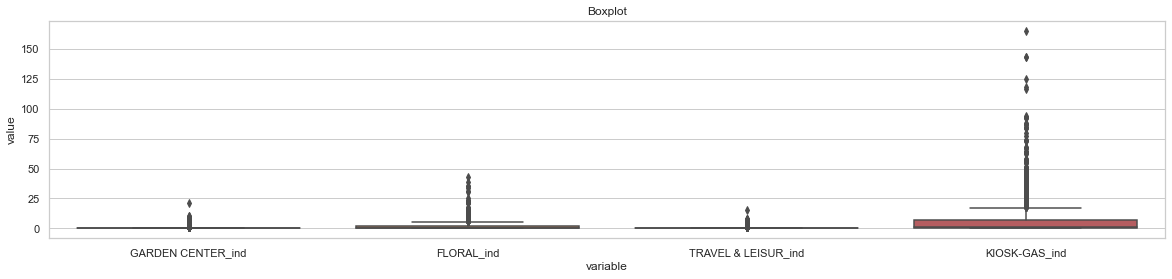

In [65]:
#boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plotdf = model_tr.iloc[:, 21:25]
sns.set(font_scale = 0.8)
sns.set_theme(style= "whitegrid")
fig = plt.figure(figsize = (20,4))
sns.boxplot(x="variable", y="value", data=pd.melt(plotdf)).set(title = "Boxplot")

In [56]:
#corrgrid = model_tr.corr().unstack().sort_values().drop_duplicates()
#corrgrid.to_csv("corrgrid.csv")

In [ ]:
#variable clustering 

In [66]:
%%capture
pip install factor_analyzer

In [67]:
import pandas as pd
import numpy as np
import random
import collections
import math
from factor_analyzer import Rotator


class VarClusHi(object):

    def __init__(self,df,feat_list=None,maxeigval2=1,maxclus=None,n_rs=0):

        if feat_list is None:
            self.df = df
            self.feat_list = df.columns.tolist()
        else:
            self.df = df[feat_list]
            self.feat_list = feat_list
        self.maxeigval2 = maxeigval2
        self.maxclus = maxclus
        self.n_rs = n_rs

    @staticmethod
    def correig(df, feat_list=None, n_pcs=2):

        if feat_list is None:
            feat_list = df.columns.tolist()
        else:
            df = df[feat_list]

        if len(feat_list) <= 1:
            corr = [len(feat_list)]
            eigvals = [len(feat_list)] + [0] * (n_pcs - 1)
            eigvecs = np.array([[len(feat_list)]])
            varprops = [sum(eigvals)]
        else:
            corr = np.corrcoef(df.values.T)
            raw_eigvals, raw_eigvecs = np.linalg.eigh(corr)
            idx = np.argsort(raw_eigvals)[::-1]
            eigvals, eigvecs = raw_eigvals[idx], raw_eigvecs[:, idx]
            eigvals, eigvecs = eigvals[:n_pcs], eigvecs[:, :n_pcs]
            varprops = eigvals / sum(raw_eigvals)

        corr_df = pd.DataFrame(corr, columns=feat_list, index=feat_list)

        return eigvals, eigvecs, corr_df, varprops


    @staticmethod
    def pca(df, feat_list=None, n_pcs=2):

        if feat_list is None:
            feat_list = df.columns.tolist()
        else:
            df = df[feat_list]

        stand_df = (df - df.mean()) / df.std()

        eigvals, eigvecs, _, varprops = VarClusHi.correig(df, feat_list, n_pcs=n_pcs)

        if len(feat_list) <= 1:
            princomps = stand_df.values
        else:
            princomps = np.dot(stand_df.values, eigvecs)

        return eigvals, eigvecs, princomps, varprops


    @staticmethod
    def _calc_tot_var(df, *clusters):

        tot_len, tot_var, tot_prop = (0,) * 3

        for clus in clusters:
            if clus == []:
                continue

            c_len = len(clus)
            c_eigvals, _, _, c_varprops = VarClusHi.correig(df[clus])
            tot_var += c_eigvals[0]
            tot_prop = (tot_prop * tot_len + c_varprops[0] * c_len) / (tot_len + c_len)
            tot_len += c_len

        return tot_var, tot_prop


    @staticmethod
    def _reassign(df, clus1, clus2, feat_list=None):

        if feat_list is None:
            feat_list = clus1 + clus2

        init_var = VarClusHi._calc_tot_var(df, clus1, clus2)[0]
        fin_clus1, fin_clus2 = clus1[:], clus2[:]
        check_var, max_var = (init_var,) * 2

        while (True):

            for feat in feat_list:
                new_clus1, new_clus2 = fin_clus1[:], fin_clus2[:]
                if feat in new_clus1:
                    new_clus1.remove(feat)
                    new_clus2.append(feat)
                elif feat in new_clus2:
                    new_clus1.append(feat)
                    new_clus2.remove(feat)
                else:
                    continue

                new_var = VarClusHi._calc_tot_var(df, new_clus1, new_clus2)[0]
                if new_var > check_var:
                    check_var = new_var
                    fin_clus1, fin_clus2 = new_clus1[:], new_clus2[:]

            if max_var == check_var:
                break
            else:
                max_var = check_var

        return fin_clus1, fin_clus2, max_var


    @staticmethod
    def _reassign_rs(df, clus1, clus2, n_rs=0):

        feat_list = clus1 + clus2
        fin_rs_clus1, fin_rs_clus2, max_rs_var = VarClusHi._reassign(df, clus1, clus2)

        for _ in range(n_rs):
            random.shuffle(feat_list)
            rs_clus1, rs_clus2, rs_var = VarClusHi._reassign(df, clus1, clus2, feat_list)
            if rs_var > max_rs_var:
                max_rs_var = rs_var
                fin_rs_clus1, fin_rs_clus2 = rs_clus1, rs_clus2

        return fin_rs_clus1, fin_rs_clus2, max_rs_var


    def _varclusspu(self):

        ClusInfo = collections.namedtuple('ClusInfo', ['clus', 'eigval1', 'eigval2', 'eigvecs','varprop'])
        c_eigvals, c_eigvecs, c_corrs, c_varprops = VarClusHi.correig(self.df[self.feat_list])

        self.corrs = c_corrs

        clus0 = ClusInfo(clus=self.feat_list,
                         eigval1=c_eigvals[0],
                         eigval2=c_eigvals[1],
                         eigvecs=c_eigvecs,
                         varprop=c_varprops[0]
                         )
        self.clusters = collections.OrderedDict([(0, clus0)])

        while (True):

            if self.maxclus is not None and len(self.clusters) >= self.maxclus:
                break

            idx = max(self.clusters, key=lambda x: self.clusters.get(x).eigval2)
            if self.clusters[idx].eigval2 > self.maxeigval2:
                split_clus = self.clusters[idx].clus
                c_eigvals, c_eigvecs, split_corrs, _ = VarClusHi.correig(self.df[split_clus])
            else:
                break

            if c_eigvals[1] > self.maxeigval2:
                clus1, clus2 = [], []
                rotator = Rotator(method='quartimax')
                r_eigvecs = rotator.fit_transform(pd.DataFrame(c_eigvecs))

                comb_sigma1 = math.sqrt(np.dot(np.dot(r_eigvecs[:, 0], split_corrs.values), r_eigvecs[:, 0].T))
                comb_sigma2 = math.sqrt(np.dot(np.dot(r_eigvecs[:, 1], split_corrs.values), r_eigvecs[:, 1].T))

                for feat in split_clus:

                    comb_cov1 = np.dot(r_eigvecs[:, 0], split_corrs[feat].values.T)
                    comb_cov2 = np.dot(r_eigvecs[:, 1], split_corrs[feat].values.T)

                    corr_pc1 = comb_cov1/comb_sigma1
                    corr_pc2 = comb_cov2/comb_sigma2

                    if abs(corr_pc1) > abs(corr_pc2):
                        clus1.append(feat)
                    else:
                        clus2.append(feat)

                fin_clus1, fin_clus2, _ = VarClusHi._reassign_rs(self.df, clus1, clus2,self.n_rs)
                c1_eigvals, c1_eigvecs, _, c1_varprops = VarClusHi.correig(self.df[fin_clus1])
                c2_eigvals, c2_eigvecs, _, c2_varprops = VarClusHi.correig(self.df[fin_clus2])

                self.clusters[idx] = ClusInfo(clus=fin_clus1,
                                              eigval1=c1_eigvals[0],
                                              eigval2=c1_eigvals[1],
                                              eigvecs=c1_eigvecs,
                                              varprop=c1_varprops[0]
                                              )
                self.clusters[len(self.clusters)] = ClusInfo(clus=fin_clus2,
                                                             eigval1=c2_eigvals[0],
                                                             eigval2=c2_eigvals[1],
                                                             eigvecs=c2_eigvecs,
                                                             varprop=c2_varprops[0]
                                                             )
            else:
                break

        return self


    def varclus(self,speedup=True):
        
        self.speedup = speedup

        if self.speedup is True:
            return self._varclusspu()

        ClusInfo = collections.namedtuple('ClusInfo', ['clus','eigval1','eigval2','pc1','varprop'])
        c_eigvals, _, c_princomps, c_varprops = VarClusHi.pca(self.df[self.feat_list])
        clus0 = ClusInfo(clus=self.feat_list,
                         eigval1=c_eigvals[0],
                         eigval2=c_eigvals[1],
                         pc1=c_princomps[:, 0],
                         varprop=c_varprops[0]
                         )
        self.clusters = collections.OrderedDict([(0, clus0)])

        while (True):

            if self.maxclus is not None and len(self.clusters) >= self.maxclus:
                break

            idx = max(self.clusters, key=lambda x: self.clusters.get(x).eigval2)
            if self.clusters[idx].eigval2 > self.maxeigval2:
                split_clus = self.clusters[idx].clus
                c_eigvals, c_eigvecs, _, _ = VarClusHi.pca(self.df[split_clus])
            else:
                break

            if c_eigvals[1] > self.maxeigval2:
                clus1, clus2 = [], []
                rotator = Rotator(method='quartimax')
                r_eigvecs = rotator.fit_transform(pd.DataFrame(c_eigvecs))
                stand_df = (self.df - self.df.mean()) / self.df.std()
                r_pcs = np.dot(stand_df[split_clus].values, r_eigvecs)

                for feat in split_clus:

                    corr_pc1 = np.corrcoef(self.df[feat].values.T, r_pcs[:, 0])[0, 1]
                    corr_pc2 = np.corrcoef(self.df[feat].values.T, r_pcs[:, 1])[0, 1]

                    if abs(corr_pc1) > abs(corr_pc2):
                        clus1.append(feat)
                    else:
                        clus2.append(feat)

                fin_clus1, fin_clus2, _ = VarClusHi._reassign_rs(self.df, clus1, clus2,self.n_rs)
                c1_eigvals, _, c1_princomps, c1_varprops = VarClusHi.pca(self.df[fin_clus1])
                c2_eigvals, _, c2_princomps, c2_varprops = VarClusHi.pca(self.df[fin_clus2])

                self.clusters[idx] = ClusInfo(clus=fin_clus1,
                                              eigval1=c1_eigvals[0],
                                              eigval2=c1_eigvals[1],
                                              pc1=c1_princomps[:, 0],
                                              varprop=c1_varprops[0]
                                              )
                self.clusters[len(self.clusters)] = ClusInfo(clus=fin_clus2,
                                                             eigval1=c2_eigvals[0],
                                                             eigval2=c2_eigvals[1],
                                                             pc1=c2_princomps[:, 0],
                                                             varprop=c2_varprops[0]
                                                             )
            else:
                break

        return self


    @property
    def info(self):

        cols = ['Cluster', 'N_Vars' ,'Eigval1', 'Eigval2', 'VarProp']
        info_table = pd.DataFrame(columns=cols)

        n_row = 0
        for i, clusinfo in self.clusters.items():
            row = [repr(i), repr(len(clusinfo.clus)), clusinfo.eigval1, clusinfo.eigval2, clusinfo.varprop]
            info_table.loc[n_row] = row
            n_row += 1

        return info_table


    def _rsquarespu(self):

        cols = ['Cluster', 'Variable', 'RS_Own', 'RS_NC', 'RS_Ratio']
        rs_table = pd.DataFrame(columns=cols)

        sigmas = []
        for _, clusinfo in self.clusters.items():
            c_eigvec = clusinfo.eigvecs[:, 0]
            c_sigma = math.sqrt(np.dot(np.dot(c_eigvec, self.corrs.loc[clusinfo.clus,clusinfo.clus].values), c_eigvec.T))
            sigmas.append(c_sigma)

        n_row = 0
        for i, clus_own in self.clusters.items():
            for feat in clus_own.clus:
                row = [i, feat]

                cov_own = np.dot(clus_own.eigvecs[:,0], self.corrs.loc[feat, clus_own.clus].values.T)
                rs_own = (cov_own/sigmas[i]) ** 2

                rs_others = []
                for j, clus_other in self.clusters.items():
                    if j == i: continue

                    cov_other = np.dot(clus_other.eigvecs[:,0], self.corrs.loc[feat, clus_other.clus].values.T)
                    rs = (cov_other/sigmas[j]) ** 2

                    rs_others.append(rs)

                rs_nc = max(rs_others) if len(rs_others) > 0 else 0
                row += [rs_own, rs_nc, (1 - rs_own) / (1 - rs_nc)]
                rs_table.loc[n_row] = row
                n_row += 1

        return rs_table


    @property
    def rsquare(self):

        if self.speedup is True:
            return self._rsquarespu()

        cols = ['Cluster', 'Variable', 'RS_Own', 'RS_NC', 'RS_Ratio']
        rs_table = pd.DataFrame(columns=cols)

        pcs = [clusinfo.pc1 for _, clusinfo in self.clusters.items()]

        n_row = 0
        for i, clusinfo in self.clusters.items():
            for feat in clusinfo.clus:
                row = [i, feat]

                rs_own = np.corrcoef(self.df[feat].values.T, clusinfo.pc1)[0, 1] ** 2

                rs_others = []

                for j, pc in enumerate(pcs):
                    if j == i: continue

                    rs = np.corrcoef(self.df[feat].values.T, pc)[0, 1] ** 2

                    rs_others.append(rs)

                rs_nc = max(rs_others) if len(rs_others) > 0 else 0
                row += [rs_own, rs_nc, (1 - rs_own) / (1 - rs_nc)]
                rs_table.loc[n_row] = row
                n_row += 1

        return rs_table
    
if __name__ == '__main__':
	demo_df = model_tr.copy()
	demo_df.drop(['household_key','Target'], axis=1, inplace=True)
	demo_vc = VarClusHi(demo_df, maxeigval2 =0.8)
	demo_vc.varclus()
	print(demo_vc.info)
	print(demo_vc.rsquare)

   Cluster N_Vars   Eigval1   Eigval2   VarProp
0        0      8  7.264206  0.330791  0.908026
1        1      5  4.316508  0.599753  0.863302
2        2      4  3.870349  0.101444  0.967587
3        3      4  3.598509  0.280928  0.899627
4        4      4  3.577006  0.275266  0.894252
5        5      4  3.360749  0.527108  0.840187
6        6      4  3.620159  0.298799  0.905040
7        7      4  3.348097  0.502304  0.837024
8        8      4  3.737002  0.172557  0.934250
9        9      3  2.892296  0.073272  0.964099
10      10      3  2.710438  0.255252  0.903479
11      11      3  2.855951  0.133459  0.951984
12      12      3  2.764065  0.176105  0.921355
13      13      3  2.957397  0.031330  0.985799
14      14      4  2.796006  0.722725  0.699001
15      15      4  3.754421  0.167521  0.938605
16      16      3  2.224753  0.673435  0.741584
17      17      4  3.026470  0.794036  0.756618
18      18      2  1.611345  0.388655  0.805672
19      19      2  1.839409  0.160591  0

In [68]:
output_1 = demo_vc.rsquare.sort_values(["Cluster", "RS_Ratio"], ascending=[True,True]).groupby("Cluster").first()
output_1

,Variable,RS_Own,RS_NC,RS_Ratio
Cluster,,,,
0,count_diff_items_bought,0.967602,0.648632,9.220580e-02
1,MISC_SALES TRAN_sales,0.975516,0.416518,4.196197e-02
2,NUTRITION_qty,0.988578,0.259104,1.541615e-02
3,COSMETICS_ind,0.966158,0.271317,4.644318e-02
4,SEAFOOD_qty,0.945476,0.210280,6.904280e-02
5,TRAVEL&LEISUR_qty,0.943510,0.070379,6.076677e-02
6,DELI_qty,0.960857,0.401903,6.544650e-02
7,SALAD BAR_ind,0.950576,0.072165,5.326844e-02
8,KIOSK_GAS_sales,0.980477,0.247572,2.594630e-02


In [69]:
keep_list = output_1.Variable.to_list()
keep_list.extend(['household_key','Target'])
model_tr1 = model_tr.loc[:,keep_list]
model_tr1.shape

(1750, 72)

In [71]:
import pandas as pd
import numpy as np
import random
import collections
import math
from factor_analyzer import Rotator


class VarClusHi(object):

    def __init__(self,df,feat_list=None,maxeigval2=1,maxclus=None,n_rs=0):

        if feat_list is None:
            self.df = df
            self.feat_list = df.columns.tolist()
        else:
            self.df = df[feat_list]
            self.feat_list = feat_list
        self.maxeigval2 = maxeigval2
        self.maxclus = maxclus
        self.n_rs = n_rs

    @staticmethod
    def correig(df, feat_list=None, n_pcs=2):

        if feat_list is None:
            feat_list = df.columns.tolist()
        else:
            df = df[feat_list]

        if len(feat_list) <= 1:
            corr = [len(feat_list)]
            eigvals = [len(feat_list)] + [0] * (n_pcs - 1)
            eigvecs = np.array([[len(feat_list)]])
            varprops = [sum(eigvals)]
        else:
            corr = np.corrcoef(df.values.T)
            raw_eigvals, raw_eigvecs = np.linalg.eigh(corr)
            idx = np.argsort(raw_eigvals)[::-1]
            eigvals, eigvecs = raw_eigvals[idx], raw_eigvecs[:, idx]
            eigvals, eigvecs = eigvals[:n_pcs], eigvecs[:, :n_pcs]
            varprops = eigvals / sum(raw_eigvals)

        corr_df = pd.DataFrame(corr, columns=feat_list, index=feat_list)

        return eigvals, eigvecs, corr_df, varprops


    @staticmethod
    def pca(df, feat_list=None, n_pcs=2):

        if feat_list is None:
            feat_list = df.columns.tolist()
        else:
            df = df[feat_list]

        stand_df = (df - df.mean()) / df.std()

        eigvals, eigvecs, _, varprops = VarClusHi.correig(df, feat_list, n_pcs=n_pcs)

        if len(feat_list) <= 1:
            princomps = stand_df.values
        else:
            princomps = np.dot(stand_df.values, eigvecs)

        return eigvals, eigvecs, princomps, varprops


    @staticmethod
    def _calc_tot_var(df, *clusters):

        tot_len, tot_var, tot_prop = (0,) * 3

        for clus in clusters:
            if clus == []:
                continue

            c_len = len(clus)
            c_eigvals, _, _, c_varprops = VarClusHi.correig(df[clus])
            tot_var += c_eigvals[0]
            tot_prop = (tot_prop * tot_len + c_varprops[0] * c_len) / (tot_len + c_len)
            tot_len += c_len

        return tot_var, tot_prop


    @staticmethod
    def _reassign(df, clus1, clus2, feat_list=None):

        if feat_list is None:
            feat_list = clus1 + clus2

        init_var = VarClusHi._calc_tot_var(df, clus1, clus2)[0]
        fin_clus1, fin_clus2 = clus1[:], clus2[:]
        check_var, max_var = (init_var,) * 2

        while (True):

            for feat in feat_list:
                new_clus1, new_clus2 = fin_clus1[:], fin_clus2[:]
                if feat in new_clus1:
                    new_clus1.remove(feat)
                    new_clus2.append(feat)
                elif feat in new_clus2:
                    new_clus1.append(feat)
                    new_clus2.remove(feat)
                else:
                    continue

                new_var = VarClusHi._calc_tot_var(df, new_clus1, new_clus2)[0]
                if new_var > check_var:
                    check_var = new_var
                    fin_clus1, fin_clus2 = new_clus1[:], new_clus2[:]

            if max_var == check_var:
                break
            else:
                max_var = check_var

        return fin_clus1, fin_clus2, max_var


    @staticmethod
    def _reassign_rs(df, clus1, clus2, n_rs=0):

        feat_list = clus1 + clus2
        fin_rs_clus1, fin_rs_clus2, max_rs_var = VarClusHi._reassign(df, clus1, clus2)

        for _ in range(n_rs):
            random.shuffle(feat_list)
            rs_clus1, rs_clus2, rs_var = VarClusHi._reassign(df, clus1, clus2, feat_list)
            if rs_var > max_rs_var:
                max_rs_var = rs_var
                fin_rs_clus1, fin_rs_clus2 = rs_clus1, rs_clus2

        return fin_rs_clus1, fin_rs_clus2, max_rs_var


    def _varclusspu(self):

        ClusInfo = collections.namedtuple('ClusInfo', ['clus', 'eigval1', 'eigval2', 'eigvecs','varprop'])
        c_eigvals, c_eigvecs, c_corrs, c_varprops = VarClusHi.correig(self.df[self.feat_list])

        self.corrs = c_corrs

        clus0 = ClusInfo(clus=self.feat_list,
                         eigval1=c_eigvals[0],
                         eigval2=c_eigvals[1],
                         eigvecs=c_eigvecs,
                         varprop=c_varprops[0]
                         )
        self.clusters = collections.OrderedDict([(0, clus0)])

        while (True):

            if self.maxclus is not None and len(self.clusters) >= self.maxclus:
                break

            idx = max(self.clusters, key=lambda x: self.clusters.get(x).eigval2)
            if self.clusters[idx].eigval2 > self.maxeigval2:
                split_clus = self.clusters[idx].clus
                c_eigvals, c_eigvecs, split_corrs, _ = VarClusHi.correig(self.df[split_clus])
            else:
                break

            if c_eigvals[1] > self.maxeigval2:
                clus1, clus2 = [], []
                rotator = Rotator(method='quartimax')
                r_eigvecs = rotator.fit_transform(pd.DataFrame(c_eigvecs))

                comb_sigma1 = math.sqrt(np.dot(np.dot(r_eigvecs[:, 0], split_corrs.values), r_eigvecs[:, 0].T))
                comb_sigma2 = math.sqrt(np.dot(np.dot(r_eigvecs[:, 1], split_corrs.values), r_eigvecs[:, 1].T))

                for feat in split_clus:

                    comb_cov1 = np.dot(r_eigvecs[:, 0], split_corrs[feat].values.T)
                    comb_cov2 = np.dot(r_eigvecs[:, 1], split_corrs[feat].values.T)

                    corr_pc1 = comb_cov1/comb_sigma1
                    corr_pc2 = comb_cov2/comb_sigma2

                    if abs(corr_pc1) > abs(corr_pc2):
                        clus1.append(feat)
                    else:
                        clus2.append(feat)

                fin_clus1, fin_clus2, _ = VarClusHi._reassign_rs(self.df, clus1, clus2,self.n_rs)
                c1_eigvals, c1_eigvecs, _, c1_varprops = VarClusHi.correig(self.df[fin_clus1])
                c2_eigvals, c2_eigvecs, _, c2_varprops = VarClusHi.correig(self.df[fin_clus2])

                self.clusters[idx] = ClusInfo(clus=fin_clus1,
                                              eigval1=c1_eigvals[0],
                                              eigval2=c1_eigvals[1],
                                              eigvecs=c1_eigvecs,
                                              varprop=c1_varprops[0]
                                              )
                self.clusters[len(self.clusters)] = ClusInfo(clus=fin_clus2,
                                                             eigval1=c2_eigvals[0],
                                                             eigval2=c2_eigvals[1],
                                                             eigvecs=c2_eigvecs,
                                                             varprop=c2_varprops[0]
                                                             )
            else:
                break

        return self


    def varclus(self,speedup=True):
        
        self.speedup = speedup

        if self.speedup is True:
            return self._varclusspu()

        ClusInfo = collections.namedtuple('ClusInfo', ['clus','eigval1','eigval2','pc1','varprop'])
        c_eigvals, _, c_princomps, c_varprops = VarClusHi.pca(self.df[self.feat_list])
        clus0 = ClusInfo(clus=self.feat_list,
                         eigval1=c_eigvals[0],
                         eigval2=c_eigvals[1],
                         pc1=c_princomps[:, 0],
                         varprop=c_varprops[0]
                         )
        self.clusters = collections.OrderedDict([(0, clus0)])

        while (True):

            if self.maxclus is not None and len(self.clusters) >= self.maxclus:
                break

            idx = max(self.clusters, key=lambda x: self.clusters.get(x).eigval2)
            if self.clusters[idx].eigval2 > self.maxeigval2:
                split_clus = self.clusters[idx].clus
                c_eigvals, c_eigvecs, _, _ = VarClusHi.pca(self.df[split_clus])
            else:
                break

            if c_eigvals[1] > self.maxeigval2:
                clus1, clus2 = [], []
                rotator = Rotator(method='quartimax')
                r_eigvecs = rotator.fit_transform(pd.DataFrame(c_eigvecs))
                stand_df = (self.df - self.df.mean()) / self.df.std()
                r_pcs = np.dot(stand_df[split_clus].values, r_eigvecs)

                for feat in split_clus:

                    corr_pc1 = np.corrcoef(self.df[feat].values.T, r_pcs[:, 0])[0, 1]
                    corr_pc2 = np.corrcoef(self.df[feat].values.T, r_pcs[:, 1])[0, 1]

                    if abs(corr_pc1) > abs(corr_pc2):
                        clus1.append(feat)
                    else:
                        clus2.append(feat)

                fin_clus1, fin_clus2, _ = VarClusHi._reassign_rs(self.df, clus1, clus2,self.n_rs)
                c1_eigvals, _, c1_princomps, c1_varprops = VarClusHi.pca(self.df[fin_clus1])
                c2_eigvals, _, c2_princomps, c2_varprops = VarClusHi.pca(self.df[fin_clus2])

                self.clusters[idx] = ClusInfo(clus=fin_clus1,
                                              eigval1=c1_eigvals[0],
                                              eigval2=c1_eigvals[1],
                                              pc1=c1_princomps[:, 0],
                                              varprop=c1_varprops[0]
                                              )
                self.clusters[len(self.clusters)] = ClusInfo(clus=fin_clus2,
                                                             eigval1=c2_eigvals[0],
                                                             eigval2=c2_eigvals[1],
                                                             pc1=c2_princomps[:, 0],
                                                             varprop=c2_varprops[0]
                                                             )
            else:
                break

        return self


    @property
    def info(self):

        cols = ['Cluster', 'N_Vars' ,'Eigval1', 'Eigval2', 'VarProp']
        info_table = pd.DataFrame(columns=cols)

        n_row = 0
        for i, clusinfo in self.clusters.items():
            row = [repr(i), repr(len(clusinfo.clus)), clusinfo.eigval1, clusinfo.eigval2, clusinfo.varprop]
            info_table.loc[n_row] = row
            n_row += 1

        return info_table


    def _rsquarespu(self):

        cols = ['Cluster', 'Variable', 'RS_Own', 'RS_NC', 'RS_Ratio']
        rs_table = pd.DataFrame(columns=cols)

        sigmas = []
        for _, clusinfo in self.clusters.items():
            c_eigvec = clusinfo.eigvecs[:, 0]
            c_sigma = math.sqrt(np.dot(np.dot(c_eigvec, self.corrs.loc[clusinfo.clus,clusinfo.clus].values), c_eigvec.T))
            sigmas.append(c_sigma)

        n_row = 0
        for i, clus_own in self.clusters.items():
            for feat in clus_own.clus:
                row = [i, feat]

                cov_own = np.dot(clus_own.eigvecs[:,0], self.corrs.loc[feat, clus_own.clus].values.T)
                rs_own = (cov_own/sigmas[i]) ** 2

                rs_others = []
                for j, clus_other in self.clusters.items():
                    if j == i: continue

                    cov_other = np.dot(clus_other.eigvecs[:,0], self.corrs.loc[feat, clus_other.clus].values.T)
                    rs = (cov_other/sigmas[j]) ** 2

                    rs_others.append(rs)

                rs_nc = max(rs_others) if len(rs_others) > 0 else 0
                row += [rs_own, rs_nc, (1 - rs_own) / (1 - rs_nc)]
                rs_table.loc[n_row] = row
                n_row += 1

        return rs_table


    @property
    def rsquare(self):

        if self.speedup is True:
            return self._rsquarespu()

        cols = ['Cluster', 'Variable', 'RS_Own', 'RS_NC', 'RS_Ratio']
        rs_table = pd.DataFrame(columns=cols)

        pcs = [clusinfo.pc1 for _, clusinfo in self.clusters.items()]

        n_row = 0
        for i, clusinfo in self.clusters.items():
            for feat in clusinfo.clus:
                row = [i, feat]

                rs_own = np.corrcoef(self.df[feat].values.T, clusinfo.pc1)[0, 1] ** 2

                rs_others = []

                for j, pc in enumerate(pcs):
                    if j == i: continue

                    rs = np.corrcoef(self.df[feat].values.T, pc)[0, 1] ** 2

                    rs_others.append(rs)

                rs_nc = max(rs_others) if len(rs_others) > 0 else 0
                row += [rs_own, rs_nc, (1 - rs_own) / (1 - rs_nc)]
                rs_table.loc[n_row] = row
                n_row += 1

        return rs_table
    
if __name__ == '__main__':
	demo_df = model_tr1.copy()
	demo_df.drop(['household_key','Target'], axis=1, inplace=True)
	demo_vc = VarClusHi(demo_df, maxeigval2 =0.85)
	demo_vc.varclus()
	print(demo_vc.info)
	print(demo_vc.rsquare)

   Cluster N_Vars   Eigval1   Eigval2   VarProp
0        0      4  3.009322  0.544522  0.752331
1        1      2  1.662409  0.337591  0.831205
2        2      2  1.322536  0.677464  0.661268
3        3      3  2.048255  0.618564  0.682752
4        4      2  1.532524  0.467476  0.766262
5        5      2  1.188690  0.811310  0.594345
6        6      2  1.309537  0.690463  0.654769
7        7      2  1.371454  0.628546  0.685727
8        8      2  1.439160  0.560840  0.719580
9        9      2  1.179144  0.820856  0.589572
10      10      1  1.000000  0.000000  1.000000
11      11      1  1.000000  0.000000  1.000000
12      12      2  1.347667  0.652333  0.673833
13      13      2  1.286513  0.713487  0.643257
14      14      1  1.000000  0.000000  1.000000
15      15      1  1.000000  0.000000  1.000000
16      16      1  1.000000  0.000000  1.000000
17      17      1  1.000000  0.000000  1.000000
18      18      1  1.000000  0.000000  1.000000
19      19      1  1.000000  0.000000  1

In [129]:
output_2 = demo_vc.rsquare.sort_values(["Cluster", "RS_Ratio"], ascending=[True,True]).groupby("Cluster").first()
output_2
#output_2.to_csv("iter3_78_vars.csv")

In [73]:
keep_list = output_2.Variable.to_list()
keep_list.extend(['household_key','Target'])
model_tr2 = model_tr.loc[:,keep_list]
model_tr2.shape

(1750, 52)

In [74]:
model_tr2.head()

,count_diff_items_bought,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,GARDEN_CENTER_qty,NUTRITION_qty,HH_COMP_DESC_Single Male,COUP/STR&MFG_qty,HOUSEHOLD_SIZE_DESC_5+,SEAFOOD_qty,AGE_DESC_55-64,HH_COMP_DESC_Single Female,INCOME_DESC_100-124K,KIOSK_GAS_sales,MARITAL_STATUS_CODE_B,MISC. TRANS._ind,AGE_DESC_35-44,INCOME_DESC_75-99K,HOMEOWNER_DESC_Renter,DAIRY_DELI_qty,INCOME_DESC_175-199K,HH_COMP_DESC_1 Adult Kids,GARDEN_CENTER_retail_disc,INCOME_DESC_15-24K,INCOME_DESC_Under 15K,DELI_qty,INCOME_DESC_50-74K,AGE_DESC_25-34,FROZEN_GROCERY_retail_disc,INCOME_DESC_125-149K,INCOME_DESC_35-49K,SPIRITS_ind,INCOME_DESC_150-174K,INCOME_DESC_250K+,days_to_second_order_nut,HOUSEHOLD_SIZE_DESC_3,HOMEOWNER_DESC_Probable Renter,AGE_DESC_65+,recency_nutr,HOMEOWNER_DESC_Probable Owner,HOUSEHOLD_SIZE_DESC_4,TRAVEL&LEISUR_qty,RESTAURANT_qty,KID_CATEGORY_DESC_None/Unknown,tenure,INCOME_DESC_25-34K,SALAD BAR_ind,AGE_DESC_19-24,HH_COMP_DESC_Unknown,AUTOMOTIVE_qty,coupon_nut_red,household_key,Target
0,1482,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,39.0,0.0,0.0,1.0,39.0,0.0,0.0,0.0,3.0,1.0,569,0.0,4,0.0,0.0,0.0,0.0,1,1.0
1,870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.01,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,463,0.0,1,0.0,1.0,0.0,0.0,3,0.0
2,295,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,266.0,0.0,0.0,0.0,0.0,1.0,513,0.0,0,1.0,0.0,0.0,0.0,4,0.0
3,219,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,2.0,1.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,1.0,504,0.0,0,0.0,0.0,0.0,0.0,5,0.0
4,897,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,5.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,591,0.0,0,0.0,0.0,0.0,0.0,7,1.0


In [75]:
class MultiScorer():
	'''
	Use this class to encapsulate and/or aggregate multiple scoring functions so that it can be passed as an argument for scoring in scikit's cross_val_score function.
	Instances of this class are also callables, with signature as needed by `cross_val_score`.
	'''

	def __init__(self, metrics):
		'''
		Create a new instance of MultiScorer.


		Parameters
		----------
		metrics: dict
			The metrics to be used by the scorer.
			The dictionary must have as key a name (str) for the metric and as value a tuple containing the metric function itself and a dict literal of the additional named arguments to be passed to the function.
			The metric function should be one of the `sklearn.metrics` function or any other callable with the same signature: `metric(y_real, y, **kwargs)`.
		'''

		self.metrics = metrics
		self.results = {}
		self._called = False
		self.n_folds = 0

		for metric in metrics.keys():
			self.results[metric] = []



	def __call__(self, estimator, X, y):
		'''
		To be called by for evaluation from sklearn's GridSearchCV or cross_val_score.
		Parameters are as they are defined in the respective documentation.

		Returns
		-------
			A dummy value of 0.5 just for compatibility reasons.
		'''

		self.n_folds += 1
		yPred = estimator.predict(X)

		for key in self.metrics.keys():
			metric, kwargs = self.metrics[key]

			self.results[key].append(metric(y, yPred, **kwargs))

		self._called = True

		return 0.5

	def get_metric_names(self):
		'''
		Get all the metric names as given when initialized

		Returns
		-------
		A list containing the given names (str) of the metrics
		'''

		return self.metrics.keys()

	def get_results(self, metric=None, fold='all'):
		'''
		Get the results of a specific or all the metrics.
		This method should be called after the object itself has been called so that the metrics are applied.

		Parameters
		----------
		metric: str or None (default)
			The given name of a metric to return its result(s). If omitted the results of all metrics will be returned.

		fold: int in range [1, number_of_folds] or 'all' (Default)
		 	Get the metric(s) results for the specific fold.
			The number of folds corresponds to the number of times the instance is called.
			If its value is a number, either the score of a single metric for that fold or a dictionary of the (single) scores for that fold will be returned, depending on the value of `metric` parameter.
			If its value is 'all', either a list of a single metric or a dictionary containing the lists of scores for all folds will be returned, depending on the value of `metric` parameter.

		Returns
		-------
		metric_result_for_one_fold
			The result of the designated metric function for the specific fold, if `metric` parameter was not omitted and an integer value was given to `fold` parameter.
			If  the value of `metric` does not correspond to a metric name, `None` will be returned.

		all_metric_results_for_one_fold: dict
			A dict having as keys the names of the metrics and as values their results for the specific fold.
			This will be returned only if `metric` parameter was omitted and an integer value was given to `fold` parameter.

		metric_results_for_all_folds: list
			A list of length number_of_folds containing the results of all folds for the specific metric, if `metric` parameter was not omitted and value 'all' was given to `fold`.
			If  the value of `metric` does not correspond to a metric name, `None` will be returned.

		all_metric_results_for_all_folds: dict of lists
			A dict having as keys the names of the metrics and as values lists (of length number_of_folds) of their results for all folds.
			This will be returned only if `metric` parameter was omitted and 'all' value was given to `fold` parameter.

		Raises
		------
		UserWarning
			If this method is called before the instance is called for evaluation.

		ValueError
			If the value for `fold` parameter is not appropriate.
		'''

		if not self._called:
			raise UserWarning('Evaluation has not been performed yet.')


		if isinstance(fold, str) and fold == 'all':

			if metric is None:
				return self.results
			else:
				return self.results[metric]

		elif isinstance(fold, int):

			if fold not in range(1, self.n_folds+1): raise ValueError('Invalid fold index: '+str(fold))

			if metric is None:
				res = dict()

				for key in self.results.keys():
					res[key] = self.results[key][fold-1]

				return res

			else:
				return self.results[metric][fold-1]
		else:
			raise ValueError('Unexpected fold value: %s' %(str(fold)))

In [76]:
# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
#from multiscorer import MultiScorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
#import xgboost as xgb
import time

In [77]:
model_tr2.head()

,count_diff_items_bought,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,GARDEN_CENTER_qty,NUTRITION_qty,HH_COMP_DESC_Single Male,COUP/STR&MFG_qty,HOUSEHOLD_SIZE_DESC_5+,SEAFOOD_qty,AGE_DESC_55-64,HH_COMP_DESC_Single Female,INCOME_DESC_100-124K,KIOSK_GAS_sales,MARITAL_STATUS_CODE_B,MISC. TRANS._ind,AGE_DESC_35-44,INCOME_DESC_75-99K,HOMEOWNER_DESC_Renter,DAIRY_DELI_qty,INCOME_DESC_175-199K,HH_COMP_DESC_1 Adult Kids,GARDEN_CENTER_retail_disc,INCOME_DESC_15-24K,INCOME_DESC_Under 15K,DELI_qty,INCOME_DESC_50-74K,AGE_DESC_25-34,FROZEN_GROCERY_retail_disc,INCOME_DESC_125-149K,INCOME_DESC_35-49K,SPIRITS_ind,INCOME_DESC_150-174K,INCOME_DESC_250K+,days_to_second_order_nut,HOUSEHOLD_SIZE_DESC_3,HOMEOWNER_DESC_Probable Renter,AGE_DESC_65+,recency_nutr,HOMEOWNER_DESC_Probable Owner,HOUSEHOLD_SIZE_DESC_4,TRAVEL&LEISUR_qty,RESTAURANT_qty,KID_CATEGORY_DESC_None/Unknown,tenure,INCOME_DESC_25-34K,SALAD BAR_ind,AGE_DESC_19-24,HH_COMP_DESC_Unknown,AUTOMOTIVE_qty,coupon_nut_red,household_key,Target
0,1482,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.0,39.0,0.0,0.0,1.0,39.0,0.0,0.0,0.0,3.0,1.0,569,0.0,4,0.0,0.0,0.0,0.0,1,1.0
1,870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.01,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,463,0.0,1,0.0,1.0,0.0,0.0,3,0.0
2,295,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,266.0,0.0,0.0,0.0,0.0,1.0,513,0.0,0,1.0,0.0,0.0,0.0,4,0.0
3,219,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,1.0,0.0,0.0,1.0,0,0.0,0.0,2.0,1.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,1.0,504,0.0,0,0.0,0.0,0.0,0.0,5,0.0
4,897,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,5.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,591,0.0,0,0.0,0.0,0.0,0.0,7,1.0


In [93]:
model_tr2.shape

(1750, 52)

In [94]:
X_train = model_tr2.iloc[:, 0:50] #change here
y_train = model_tr2.loc[:, ["Target"]].astype(int)

In [95]:
# Create an array of models
models = []
models.append(("LogisticRegression", LogisticRegression()))
models.append(("GaussianNB", GaussianNB()))
models.append(("RandomForestClassifier", RandomForestClassifier()))
models.append(("SVC", SVC()))
models.append(("DecisionTreeClassifier", DecisionTreeClassifier()))
#models.append(("LogisticRegression", LogisticRegression()))
#models.append(("xgb.XGBClassifier", xgb.XGBClassifier(eval_metric='mlogloss')))
models.append(("KNeighborsClassifier", KNeighborsClassifier()))
models

[('LogisticRegression', LogisticRegression()),
 ('GaussianNB', GaussianNB()),
 ('RandomForestClassifier', RandomForestClassifier()),
 ('SVC', SVC()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('KNeighborsClassifier', KNeighborsClassifier())]

In [96]:
# Measuring the metrics of the different models
scorer = MultiScorer({'accuracy'  : (accuracy_score , {}), 
                      'f1_score'  : (f1_score       , {'pos_label': 3, 'average':'macro'}), 
                      'recall'    : (recall_score   , {'pos_label': 3, 'average':'macro'}), 
                      'precision' : (precision_score, {'pos_label': 3, 'average':'macro'})
                     })

In [97]:

# A dictionary for all the distinct models and their respective metrics
model_scores_dict = {'model_name' : [], 
                     'accuracy'   : [], 
                     'f1_score'   : [], 
                     'recall'     : [], 
                     'precision'  : [],
                     'time'       : []
                    }
model_scores_dict

{'model_name': [],
 'accuracy': [],
 'f1_score': [],
 'recall': [],
 'precision': [],
 'time': []}

In [98]:
# For each model name and model in models
for model_name, model in models: 
    
    # Add model_name to model_scores_dict 
    model_scores_dict['model_name'].append(model_name)
    #print(model_name)
    kfold = KFold(n_splits=2, random_state=24, shuffle=True)
    start = time.time()
    _ = cross_val_score(model, X_train, y_train, cv = kfold, scoring = scorer)
    cv_result = scorer.get_results()
    
    # For each metric in cv_result.keys()
    for metric_name in cv_result.keys():
        # Get the average of cv_result[metric_name]
        average_score = np.average(cv_result[metric_name])
        # Update model_scores_dict with average_score for model_name
        model_scores_dict[metric_name].append(average_score)
        #print('%s : %f' %(metric_name, average_score))
    model_scores_dict['time'].append((time.time() - start))
    #print('time : ', time.time() - start, '\n\n')
 

In [99]:
model_scores_dict

{'model_name': ['LogisticRegression',
  'GaussianNB',
  'RandomForestClassifier',
  'SVC',
  'DecisionTreeClassifier',
  'KNeighborsClassifier'],
 'accuracy': [0.7897142857142858,
  0.7622857142857143,
  0.7784761904761904,
  0.7630000000000001,
  0.7506285714285715,
  0.7435238095238096],
 'f1_score': [0.7290641549111869,
  0.69404344572602,
  0.7196226853624855,
  0.6854888533514347,
  0.6816080398374804,
  0.6767574562470253],
 'recall': [0.7113677578524706,
  0.6808562033411311,
  0.7062597955902529,
  0.6784548271509407,
  0.6767081952283214,
  0.6719025771447772],
 'precision': [0.7898358287054568,
  0.7470413117886259,
  0.7635701588005994,
  0.7505224886935721,
  0.7332106158776728,
  0.7217057392994156],
 'time': [0.12223601341247559,
  0.02322983741760254,
  0.5364711284637451,
  0.35907506942749023,
  0.03292965888977051,
  0.12470388412475586]}

In [35]:
#model_score_df = pd.DataFrame(model_scores_dict).set_index("model_name") #no demo and coupon data
#model_score_df.sort_values(by=["accuracy", "f1_score", "time"], ascending=False)

,accuracy,f1_score,recall,precision,time
model_name,,,,,
RandomForestClassifier,0.745948,0.672539,0.665967,0.715178,0.489053
SVC,0.736560,0.652520,0.648623,0.704008,0.284870
DecisionTreeClassifier,0.730815,0.655244,0.651995,0.696581,0.026275
KNeighborsClassifier,0.729272,0.657495,0.653826,0.693810,0.100565
LogisticRegression,0.727270,0.640767,0.633691,0.695256,0.117614
GaussianNB,0.722124,0.631126,0.625570,0.687764,0.016973


In [100]:
model_score_df = pd.DataFrame(model_scores_dict).set_index("model_name")
model_score_df.sort_values(by=["accuracy", "f1_score", "time"], ascending=False)

,accuracy,f1_score,recall,precision,time
model_name,,,,,
LogisticRegression,0.789714,0.729064,0.711368,0.789836,0.122236
RandomForestClassifier,0.778476,0.719623,0.706260,0.763570,0.536471
SVC,0.763000,0.685489,0.678455,0.750522,0.359075
GaussianNB,0.762286,0.694043,0.680856,0.747041,0.023230
DecisionTreeClassifier,0.750629,0.681608,0.676708,0.733211,0.032930
KNeighborsClassifier,0.743524,0.676757,0.671903,0.721706,0.124704


### test data

In [117]:
import pandas as pd
#df_test = pd.read_csv("txn_plus_demo_df_test.csv")
df_test = pd.read_csv("test_df_21m_v2.csv")
df_test.fillna(0, inplace = True)
df_test.head()

,Unnamed: 0,household_key,QUANTITY,SALES_VALUE,RETAIL_DISC,COUPON_DISC,COUPON_MATCH_DISC,DRUG GM_ind,DELI_ind,GROCERY_ind,SEAFOOD-PCKGD_ind,PRODUCE_ind,MEAT-PCKGD_ind,MEAT_ind,TRAVEL & LEISUR_ind,_ind,MISC SALES TRAN_ind,KIOSK-GAS_ind,NUTRITION_ind,PASTRY_ind,SEAFOOD_ind,FLORAL_ind,GARDEN CENTER_ind,MISC. TRANS._ind,COSMETICS_ind,CHEF SHOPPE_ind,GM MERCH EXP_ind,SALAD BAR_ind,PHARMACY SUPPLY_ind,COUP/STR & MFG_ind,AUTOMOTIVE_ind,SPIRITS_ind,DAIRY DELI_ind,FROZEN GROCERY_ind,RESTAURANT_ind,POSTAL CENTER_ind,PROD-WHS SALES_ind,CNTRL/STORE SUP_ind,HBC_ind,PORK_ind,PHOTO_ind,VIDEO_ind,RX_ind,DELI/SNACK BAR_ind,_qty,AUTOMOTIVE_qty,CHEF_SHOPPE_qty,CNTRL_STORE_SUP_qty,COSMETICS_qty,COUP/STR&MFG_qty,DAIRY_DELI_qty,DELI_qty,DELI_SNACK_BAR_qty,DRUG_GM_qty,FLORAL_qty,FROZEN_GROCERY_qty,GARDEN_CENTER_qty,GM_MERCH_EXP_qty,GROCERY_qty,HBC_qty,KIOSK_GAS_qty,MEAT_qty,MEAT_PCKGD_qty,MISC_SALES TRAN_qty,MISC_TRANS_qty,NUTRITION_qty,PASTRY_qty,PHARMACY SUPPLY_qty,PHOTO_qty,PORK_qty,POSTAL_CENTER_qty,PROD-WHS SALES_qty,PRODUCE_qty,RESTAURANT_qty,RX_qty,SALAD_BAR_qty,SEAFOOD_qty,SEAFOOD_PCKGD_qty,SPIRITS_qty,TRAVEL&LEISUR_qty,VIDEO_qty,_sales,AUTOMOTIVE_sales,CHEF_SHOPPE_sales,CNTRL_STORE_SUP_sales,COSMETICS_sales,COUP/STR&MFG_sales,DAIRY_DELI_sales,DELI_sales,DELI_SNACK_BAR_sales,DRUG_GM_sales,FLORAL_sales,FROZEN_GROCERY_sales,GARDEN_CENTER_sales,GM_MERCH_EXP_sales,GROCERY_sales,HBC_sales,KIOSK_GAS_sales,MEAT_sales,MEAT_PCKGD_sales,MISC_SALES TRAN_sales,MISC_TRANS_sales,NUTRITION_sales,PASTRY_sales,PHARMACY SUPPLY_sales,PHOTO_sales,PORK_sales,POSTAL_CENTER_sales,PROD-WHS SALES_sales,PRODUCE_sales,RESTAURANT_sales,RX_sales,SALAD_BAR_sales,SEAFOOD_sales,SEAFOOD_PCKGD_sales,SPIRITS_sales,TRAVEL&LEISUR_sales,VIDEO_sales,_retail_disc,AUTOMOTIVE_retail_disc,CHEF_SHOPPE_retail_disc,CNTRL_STORE_SUP_retail_disc,COSMETICS_retail_disc,COUP/STR&MFG_retail_disc,DAIRY_DELI_retail_disc,DELI_retail_disc,DELI_SNACK_BAR_retail_disc,DRUG_GM_retail_disc,FLORAL_retail_disc,FROZEN_GROCERY_retail_disc,GARDEN_CENTER_retail_disc,GM_MERCH_EXP_retail_disc,GROCERY_retail_disc,HBC_retail_disc,KIOSK_GAS_retail_disc,MEAT_retail_disc,MEAT_PCKGD_retail_disc,MISC_SALES TRAN_retail_disc,MISC_TRANS_retail_disc,NUTRITION_retail_disc,PASTRY_retail_disc,PHARMACY SUPPLY_retail_disc,PHOTO_retail_disc,PORK_retail_disc,POSTAL_CENTER_retail_disc,PROD-WHS SALES_retail_disc,PRODUCE_retail_disc,RESTAURANT_retail_disc,RX_retail_disc,SALAD_BAR_retail_disc,SEAFOOD_retail_disc,SEAFOOD_PCKGD_retail_disc,SPIRITS_retail_disc,TRAVEL&LEISUR_retail_disc,VIDEO_retail_disc,count_diff_items_bought,no_of_depts_shopped,recency_nutr,days_to_second_order_nut,avg_gap_in_orders_nut,tenure,AGE_DESC_19-24,AGE_DESC_25-34,AGE_DESC_35-44,AGE_DESC_45-54,AGE_DESC_55-64,AGE_DESC_65+,MARITAL_STATUS_CODE_A,MARITAL_STATUS_CODE_B,MARITAL_STATUS_CODE_U,INCOME_DESC_100-124K,INCOME_DESC_125-149K,INCOME_DESC_15-24K,INCOME_DESC_150-174K,INCOME_DESC_175-199K,INCOME_DESC_200-249K,INCOME_DESC_25-34K,INCOME_DESC_250K+,INCOME_DESC_35-49K,INCOME_DESC_50-74K,INCOME_DESC_75-99K,INCOME_DESC_Under 15K,HOMEOWNER_DESC_Homeowner,HOMEOWNER_DESC_Probable Owner,HOMEOWNER_DESC_Probable Renter,HOMEOWNER_DESC_Renter,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_1 Adult Kids,HH_COMP_DESC_2 Adults Kids,HH_COMP_DESC_2 Adults No Kids,HH_COMP_DESC_Single Female,HH_COMP_DESC_Single Male,HH_COMP_DESC_Unknown,HOUSEHOLD_SIZE_DESC_1,HOUSEHOLD_SIZE_DESC_2,HOUSEHOLD_SIZE_DESC_3,HOUSEHOLD_SIZE_DESC_4,HOUSEHOLD_SIZE_DESC_5+,KID_CATEGORY_DESC_1,KID_CATEGORY_DESC_2,KID_CATEGORY_DESC_3+,KID_CATEGORY_DESC_None/Unknown,coupon_nut_red,Target
0,0,2,722,1740.67,-306.09,-9.00,0.00,91,12,398,1,58,19,22,0,0,0,0,3,10,0,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,12.0,0.0,104.0,1.0,0.0,0.0,0.0,464.0,0.0,0.0,30.0,22.0,0.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,22.07,0.0,0.0,42.74,0.0,307.80,21.99,0.0,0.00,0.0,981.16,0.0,0.00,133.75,66.38,0.00,0.0,7.47,23.82,0.0,0.0,0.0,0.0,0.0,124.50,0.0,0.0,0.00,0.00,8.99,

In [118]:
keep_list_tr = model_tr2.columns
df_test_1 = df_test.loc[:,keep_list_tr]
df_test_1.shape

(750, 52)

In [119]:
df_test_1.head()

,count_diff_items_bought,HOMEOWNER_DESC_Unknown,HH_COMP_DESC_2 Adults Kids,GARDEN_CENTER_qty,NUTRITION_qty,HH_COMP_DESC_Single Male,COUP/STR&MFG_qty,HOUSEHOLD_SIZE_DESC_5+,SEAFOOD_qty,AGE_DESC_55-64,HH_COMP_DESC_Single Female,INCOME_DESC_100-124K,KIOSK_GAS_sales,MARITAL_STATUS_CODE_B,MISC. TRANS._ind,AGE_DESC_35-44,INCOME_DESC_75-99K,HOMEOWNER_DESC_Renter,DAIRY_DELI_qty,INCOME_DESC_175-199K,HH_COMP_DESC_1 Adult Kids,GARDEN_CENTER_retail_disc,INCOME_DESC_15-24K,INCOME_DESC_Under 15K,DELI_qty,INCOME_DESC_50-74K,AGE_DESC_25-34,FROZEN_GROCERY_retail_disc,INCOME_DESC_125-149K,INCOME_DESC_35-49K,SPIRITS_ind,INCOME_DESC_150-174K,INCOME_DESC_250K+,days_to_second_order_nut,HOUSEHOLD_SIZE_DESC_3,HOMEOWNER_DESC_Probable Renter,AGE_DESC_65+,recency_nutr,HOMEOWNER_DESC_Probable Owner,HOUSEHOLD_SIZE_DESC_4,TRAVEL&LEISUR_qty,RESTAURANT_qty,KID_CATEGORY_DESC_None/Unknown,tenure,INCOME_DESC_25-34K,SALAD BAR_ind,AGE_DESC_19-24,HH_COMP_DESC_Unknown,AUTOMOTIVE_qty,coupon_nut_red,household_key,Target
0,620,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,10.0,0.0,0.0,0.0,142.0,0.0,0.0,0.0,0.0,0.0,517,0.0,0,0.0,0.0,0.0,0.0,2,0.0
1,1585,0.0,0.0,2.0,17.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,252.75,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,29.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,502,0.0,6,0.0,0.0,0.0,0.0,6,0.0
2,1540,1.0,1.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,188.94,0.0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,0.0,0.0,5,0.0,0.0,0.0,1.0,0.0,0.0,321.0,0.0,0.0,0.0,0.0,0.0,545,1.0,17,0.0,0.0,0.0,0.0,8,0.0
3,506,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,192.30,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,14.0,0.0,0.0,0.0,209.0,0.0,0.0,0.0,0.0,1.0,515,0.0,2,0.0,0.0,0.0,0.0,16,0.0
4,1554,0.0,0.0,0.0,39.0,0.0,1.0,0.0,14.0,0.0,0.0,1.0,0.00,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,0.0,1.0,524,0.0,0,0.0,0.0,0.0,0.0,18,0.0


In [120]:
X_test = df_test_1.iloc[:, 0:50] #change here
y_test = df_test_1.loc[:, "Target"].astype(int)

In [122]:
def get_confusion_matrix(y_test, y_pred):
    """
    Displays the confusion matrix of the input numpy arrays y_test and y_pred.
    
    INPUT: 
        y_test - A numpy array 
        y_pred - A numpy array
        
    OUTPUT:
        NoneType
    """
    
    data = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    conf_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], 
                              rownames=['Actual'], 
                              colnames=['Predicted'])
    
    sns.heatmap(conf_matrix, annot=True, fmt = "d", cmap="Spectral")
    plt.show()

In [123]:
log_reg_pred_y = LogisticRegression().fit(X_train, y_train).predict(X_test)

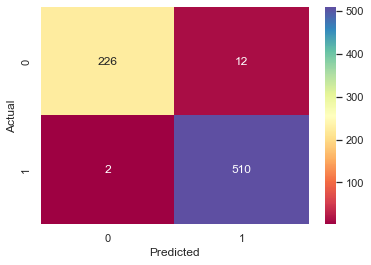

In [151]:
get_confusion_matrix(np.array(y_test), log_reg_pred_y)

In [153]:
# A dictionary of model names with the various metrics
log_reg_pred_y_dict = {"model_name" : ["LogisticRegression"], 
                        "accuracy"   : [accuracy_score(y_test, log_reg_pred_y)], 
                        "f1_score"   : [f1_score(y_test, log_reg_pred_y)], 
                        "recall"     : [recall_score(y_test, log_reg_pred_y)], 
                        "precision"  : [precision_score(y_test, log_reg_pred_y)]
                       }

# Create a dataframe with ref_xgb_log_reg_dict
log_reg_pred_y_df = pd.DataFrame(log_reg_pred_y_dict).set_index("model_name")

# Order the dataframe ref_xgb_log_reg_df by the metric values in increasing order
log_reg_pred_y_df.sort_values(by=["accuracy", "f1_score", "recall", "precision"], ascending=False)

,accuracy,f1_score,recall,precision
model_name,,,,
LogisticRegression,0.981333,0.98646,0.996094,0.977011


In [154]:
#submissiom

In [125]:
log_reg_pred_y = pd.DataFrame(log_reg_pred_y)
log_reg_pred_y.columns = ["bought_nutrition"]
log_reg_pred_y

,bought_nutrition
0,0
1,1
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [126]:
sub_df = pd.merge(df_test_1,log_reg_pred_y, left_index = True, right_index= True )
submission_df = sub_df.loc[:,["household_key" ,"bought_nutrition"]]
submission_df.bought_nutrition.value_counts()

0    578
1    172
Name: bought_nutrition, dtype: int64

In [127]:
submission_df

,household_key,bought_nutrition
0,2,0
1,6,1
2,8,0
3,16,0
4,18,1
5,21,0
6,28,0
7,30,0
8,35,0
9,37,0


In [128]:
submission_df.to_csv("submission_file.csv")